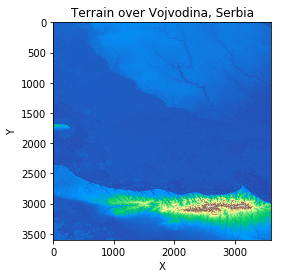

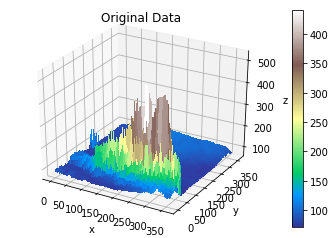

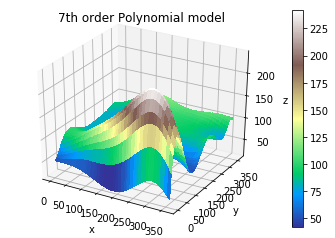

In [83]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain = imread('Temerin.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Vojvodina, Serbia')
plt.imshow(terrain, cmap='terrain')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

import imageio

im_data = imageio.imread('Temerin.tif')
data = im_data[0::10,0::10]

x = np.arange(0, np.size(data,1), 1)
y = np.arange(np.size(data,1), 0, -1)

xx, yy = np.meshgrid(x,y)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly3 = PolynomialFeatures(degree=7)
Xdes3 = poly3.fit_transform(np.c_[xx.ravel(), yy.ravel()])

z = data.reshape(-1,1)

ols3 = LinearRegression()
ols3.fit(Xdes3,z)

n_row = np.size(pdata,1)

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_row)

sort_inds_row = np.argsort(ax_row)
sort_inds_col = np.argsort(ax_col)

ROW = np.size(data,1)*ax_row[sort_inds_row]
COL = np.size(data,1)*ax_col[sort_inds_col]

ROWp, COLp = np.meshgrid(ROW, COL)

X3plot = poly3.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])

Zpredict3 = ols3.predict(X3plot)

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

surf1 = ax1.plot_surface(xx, yy, data, linewidth = 0, antialiased = False, cmap=cm.terrain)
ax1.set_title('Original Data')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
fig1.colorbar(surf1)

fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')

surf3 = ax3.plot_surface(ROWp, COLp, Zpredict3.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax3.set_title('7th order Polynomial model')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
fig3.colorbar(surf3)
